# Wel-Come To Visualizations in Python on Sales Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
SalesData=pd.read_csv('SalesData.csv')
SalesData

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [43]:
SalesData["Sales2015"].sum()

22754389.98502

In [4]:
print(SalesData.dtypes)

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object


In [6]:
SalesData.isna().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [8]:
SalesData.duplicated().sum()

0

### 1. Compare Sales by region for 2016 with 2015 using bar chart

<Figure size 1000x700 with 0 Axes>

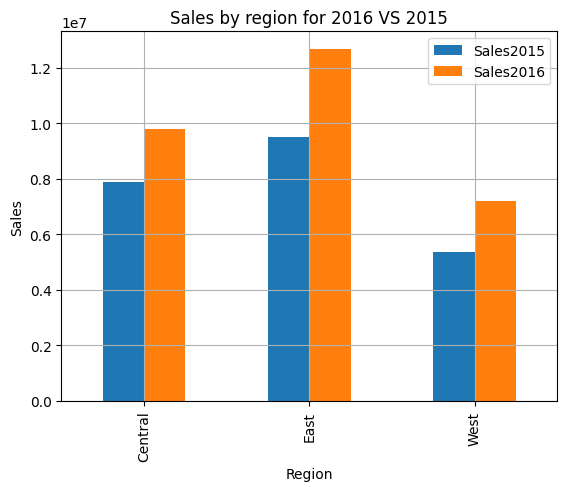

In [4]:
# using groupby
region1=SalesData.groupby('Region')[['Sales2015','Sales2016']].sum()
pd.options.display.float_format = '{:,.2f}'.format
region1
plt.figure(figsize=(10,7))
region1.plot(kind='bar')
plt.yticks()
plt.grid()
plt.title('Sales by region for 2016 VS 2015')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


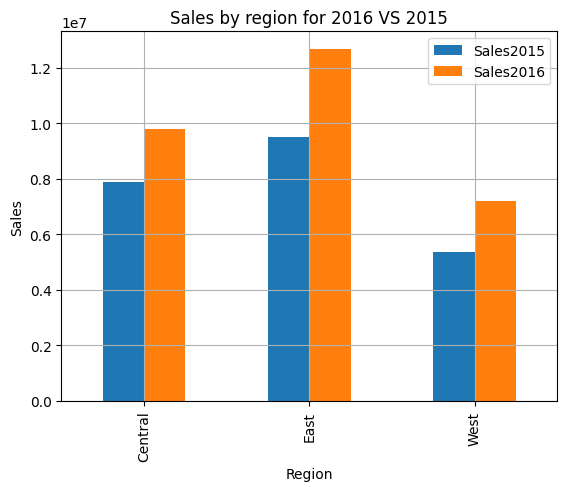

In [51]:
### Using pivot_table
region=SalesData.pivot_table(index='Region',values=['Sales2015','Sales2016'],aggfunc='sum')
region.plot(kind='bar')
plt.grid()
plt.title('Sales by region for 2016 VS 2015')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart

Text(0.5, 1.0, 'sales for each region in 2016')

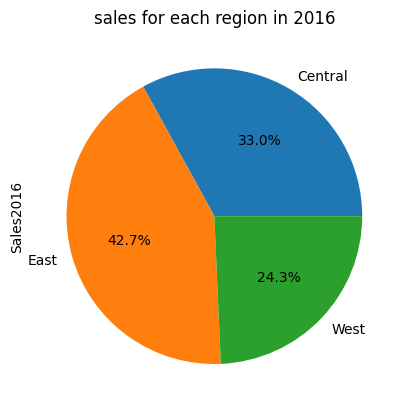

In [88]:
pie=SalesData.groupby('Region')['Sales2016'].sum()
pie.plot(kind='pie',autopct='%1.1f%%')
plt.title('sales for each region in 2016')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

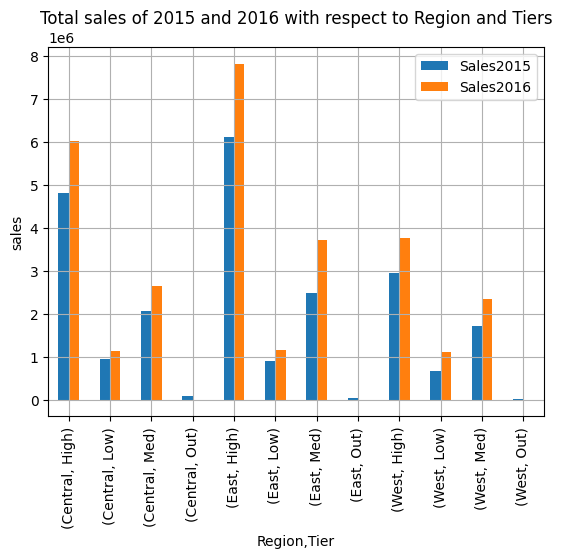

In [59]:
RT=SalesData.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()
RT.plot(kind='bar')
plt.ylabel('sales')
plt.title('Total sales of 2015 and 2016 with respect to Region and Tiers')
plt.grid()
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

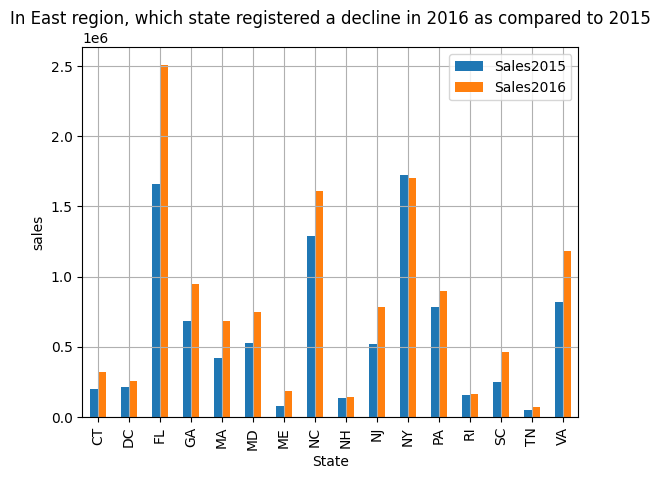

In [58]:
East=SalesData[SalesData['Region']=='East']
state=East.groupby(['State'])[['Sales2015','Sales2016']].sum()
state.plot(kind='bar')
plt.ylabel('sales')
plt.title('In East region, which state registered a decline in 2016 as compared to 2015')
plt.grid()
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

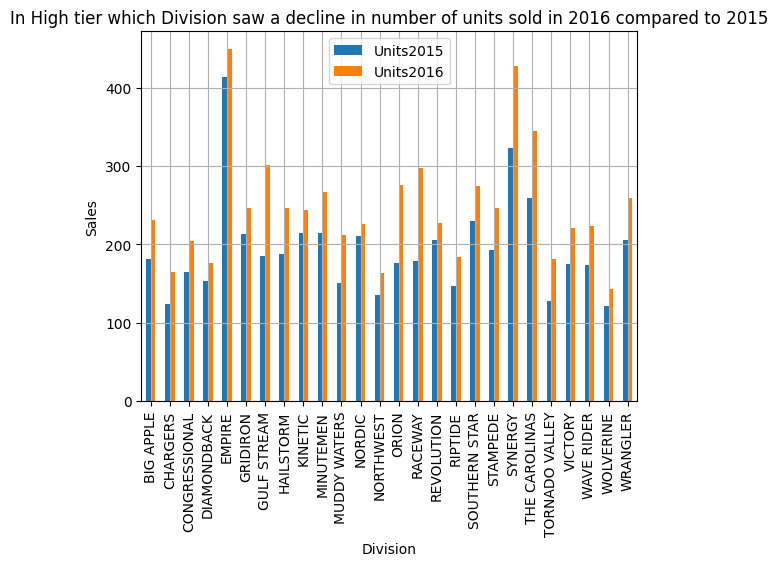

In [57]:
ht=SalesData[SalesData['Tier']=='High']
division=ht.groupby(['Division'])[['Units2015','Units2016']].sum()
division.plot(kind='bar')
plt.title('In High tier which Division saw a decline in number of units sold in 2016 compared to 2015')
plt.ylabel('Sales')
plt.grid()
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
 • Jan - Mar : Q1
 
 • Apr - Jun : Q2
 
 • Jul - Sep : Q3
 
 • Oct - Dec : Q4

In [6]:
months_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3,
    'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9,
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
SalesData['Month_Num'] = SalesData['Month'].map(months_num)
SalesData['Qtr']=np.where(SalesData['Month_Num'].between(1, 3), 'Q1',
                 np.where(SalesData['Month_Num'].between(4, 6), 'Q2',
                  np.where(SalesData['Month_Num'].between(7, 9), 'Q3',
                   np.where(SalesData['Month_Num'].between(10, 12), 'Q4',np.nan))))
SalesData

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Month_Num,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,"13,208.52",0.00,4.00,0.70,1.53,8,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,"10,500.78","23,114.91",3.00,7.00,0.84,1.31,10,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,"6,627.00",0.00,3.00,1.15,1.29,6,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,"19,881.00","13,254.00",9.00,6.00,1.33,1.17,3,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,"3,684.48",0.00,1.00,0.00,1.02,1.53,9,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,"3,684.48",0.00,1.00,0.00,1.06,1.14,2,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,"3,684.48",0.00,1.00,0.00,0.96,1.11,8,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,"5,067.70",0.00,2.00,0.00,1.11,1.55,11,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,"3,684.48",0.00,1.00,0.00,1.31,1.48,1,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

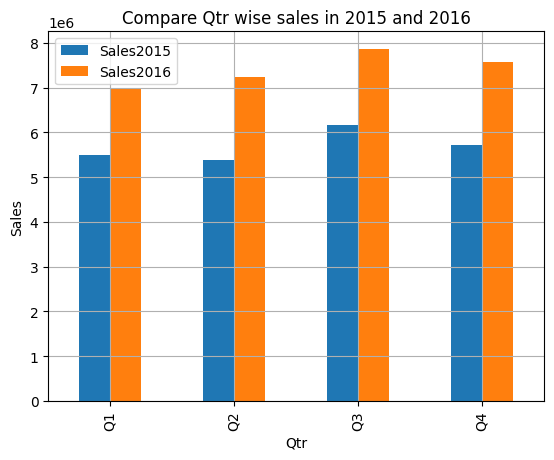

In [56]:
qtr=SalesData.groupby('Qtr')[['Sales2015','Sales2016']].sum()
pd.options.display.float_format = '{:,.1f}'.format
qtr.plot(kind='bar')
plt.title('Compare Qtr wise sales in 2015 and 2016')
plt.ylabel('Sales')
plt.grid()
plt.show()


### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

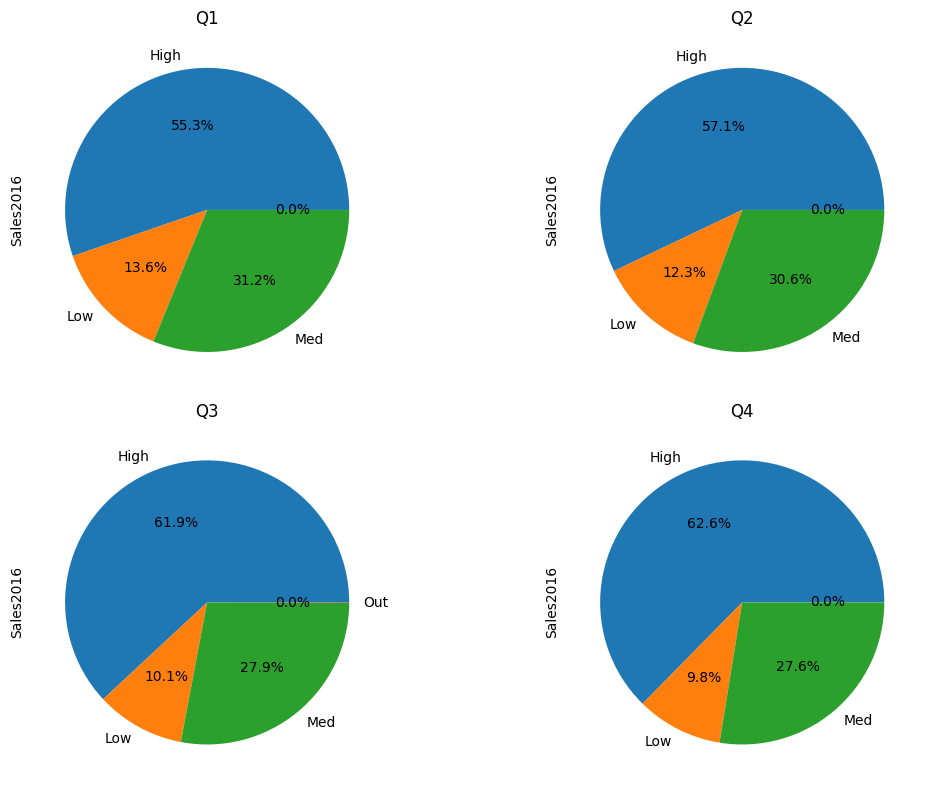

In [8]:
q1=SalesData[SalesData['Qtr'] == 'Q1']
q1s=q1.groupby('Tier')['Sales2016'].sum()
q2=SalesData[SalesData['Qtr'] == 'Q2']
q2s=q2.groupby('Tier')['Sales2016'].sum()
q3=SalesData[SalesData['Qtr'] == 'Q3']
q3s=q3.groupby('Tier')['Sales2016'].sum().abs()
q4=SalesData[SalesData['Qtr'] == 'Q4']
q4s=q4.groupby('Tier')['Sales2016'].sum()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

q1s.plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 0])
axs[0, 0].set_title('Q1')

q2s.plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 1])
axs[0, 1].set_title('Q2')

q3s.plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 0])
axs[1, 0].set_title('Q3')

q4s.plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 1])
axs[1, 1].set_title('Q4')

plt.tight_layout()
plt.show()
